In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#All library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
!pip install factor_analyzer 
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Clustering

##Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

###Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [ ]:
ads_df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Clustering Clean Ads_Data-2.xlsx")
ads_df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [ ]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
ads_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
ads_df.duplicated().sum()
#ads_df[ads_df['CTR'].isnull()][['Timestamp','InventoryType']].head()

0

In [ ]:
ads_df.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,385.16,233.65,120.00,120.00,300.00,720.00,728.00
Ad- Width,23066.0,337.90,203.09,70.00,250.00,300.00,600.00,600.00
Ad Size,23066.0,96674.47,61538.33,33600.00,72000.00,72000.00,84000.00,216000.00
Available_Impressions,23066.0,2432043.67,4742887.76,1.00,33672.25,483771.00,2527711.75,27592861.00
Matched_Queries,23066.0,1295099.14,2512969.86,1.00,18282.50,258087.50,1180700.00,14702025.00
Impressions,23066.0,1241519.52,2429399.96,1.00,7990.50,225290.00,1112428.50,14194774.00
Clicks,23066.0,10678.52,17353.41,1.00,710.00,4425.00,12793.75,143049.00
Spend,23066.0,2706.63,4067.93,0.00,85.18,1425.12,3121.40,26931.87
Fee,23066.0,0.34,0.03,0.21,0.33,0.35,0.35,0.35
Revenue,23066.0,1924.25,3105.24,0.00,55.37,926.34,2091.34,21276.18


###Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing.

In [ ]:
#CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.
ads_df['CPM'] = np.where(ads_df['CPM'].isnull(),(ads_df['Spend']/ads_df['Impressions'])*1000,ads_df['CPM'])


In [ ]:
#CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.
ads_df['CPC'] = np.where(ads_df['CPC'].isnull(),(ads_df['Spend']/ads_df['Clicks']),ads_df['CPC'])

In [ ]:
#CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.
ads_df['CTR'] = np.where(ads_df['CTR'].isnull(),(ads_df['Clicks']/ads_df['Impressions'])*100,ads_df['CTR'])

In [ ]:
ads_df[['CTR','CPM','CPC']].describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,23066.0,2.614863,7.853405,0.0001,0.0034,0.112650,0.183778,200.00
CPM,23066.0,8.396730,9.057082,0.0000,1.7500,8.370742,13.040000,715.00
CPC,23066.0,0.336652,0.341231,0.0000,0.0900,0.140000,0.550000,7.26


###Check if there are any outliers

In [ ]:
ads_df.select_dtypes(include='object').columns

Index(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type',
       'Format'],
      dtype='object')

In [ ]:
num_columns=ads_df.select_dtypes(include='number').columns
num_columns


Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

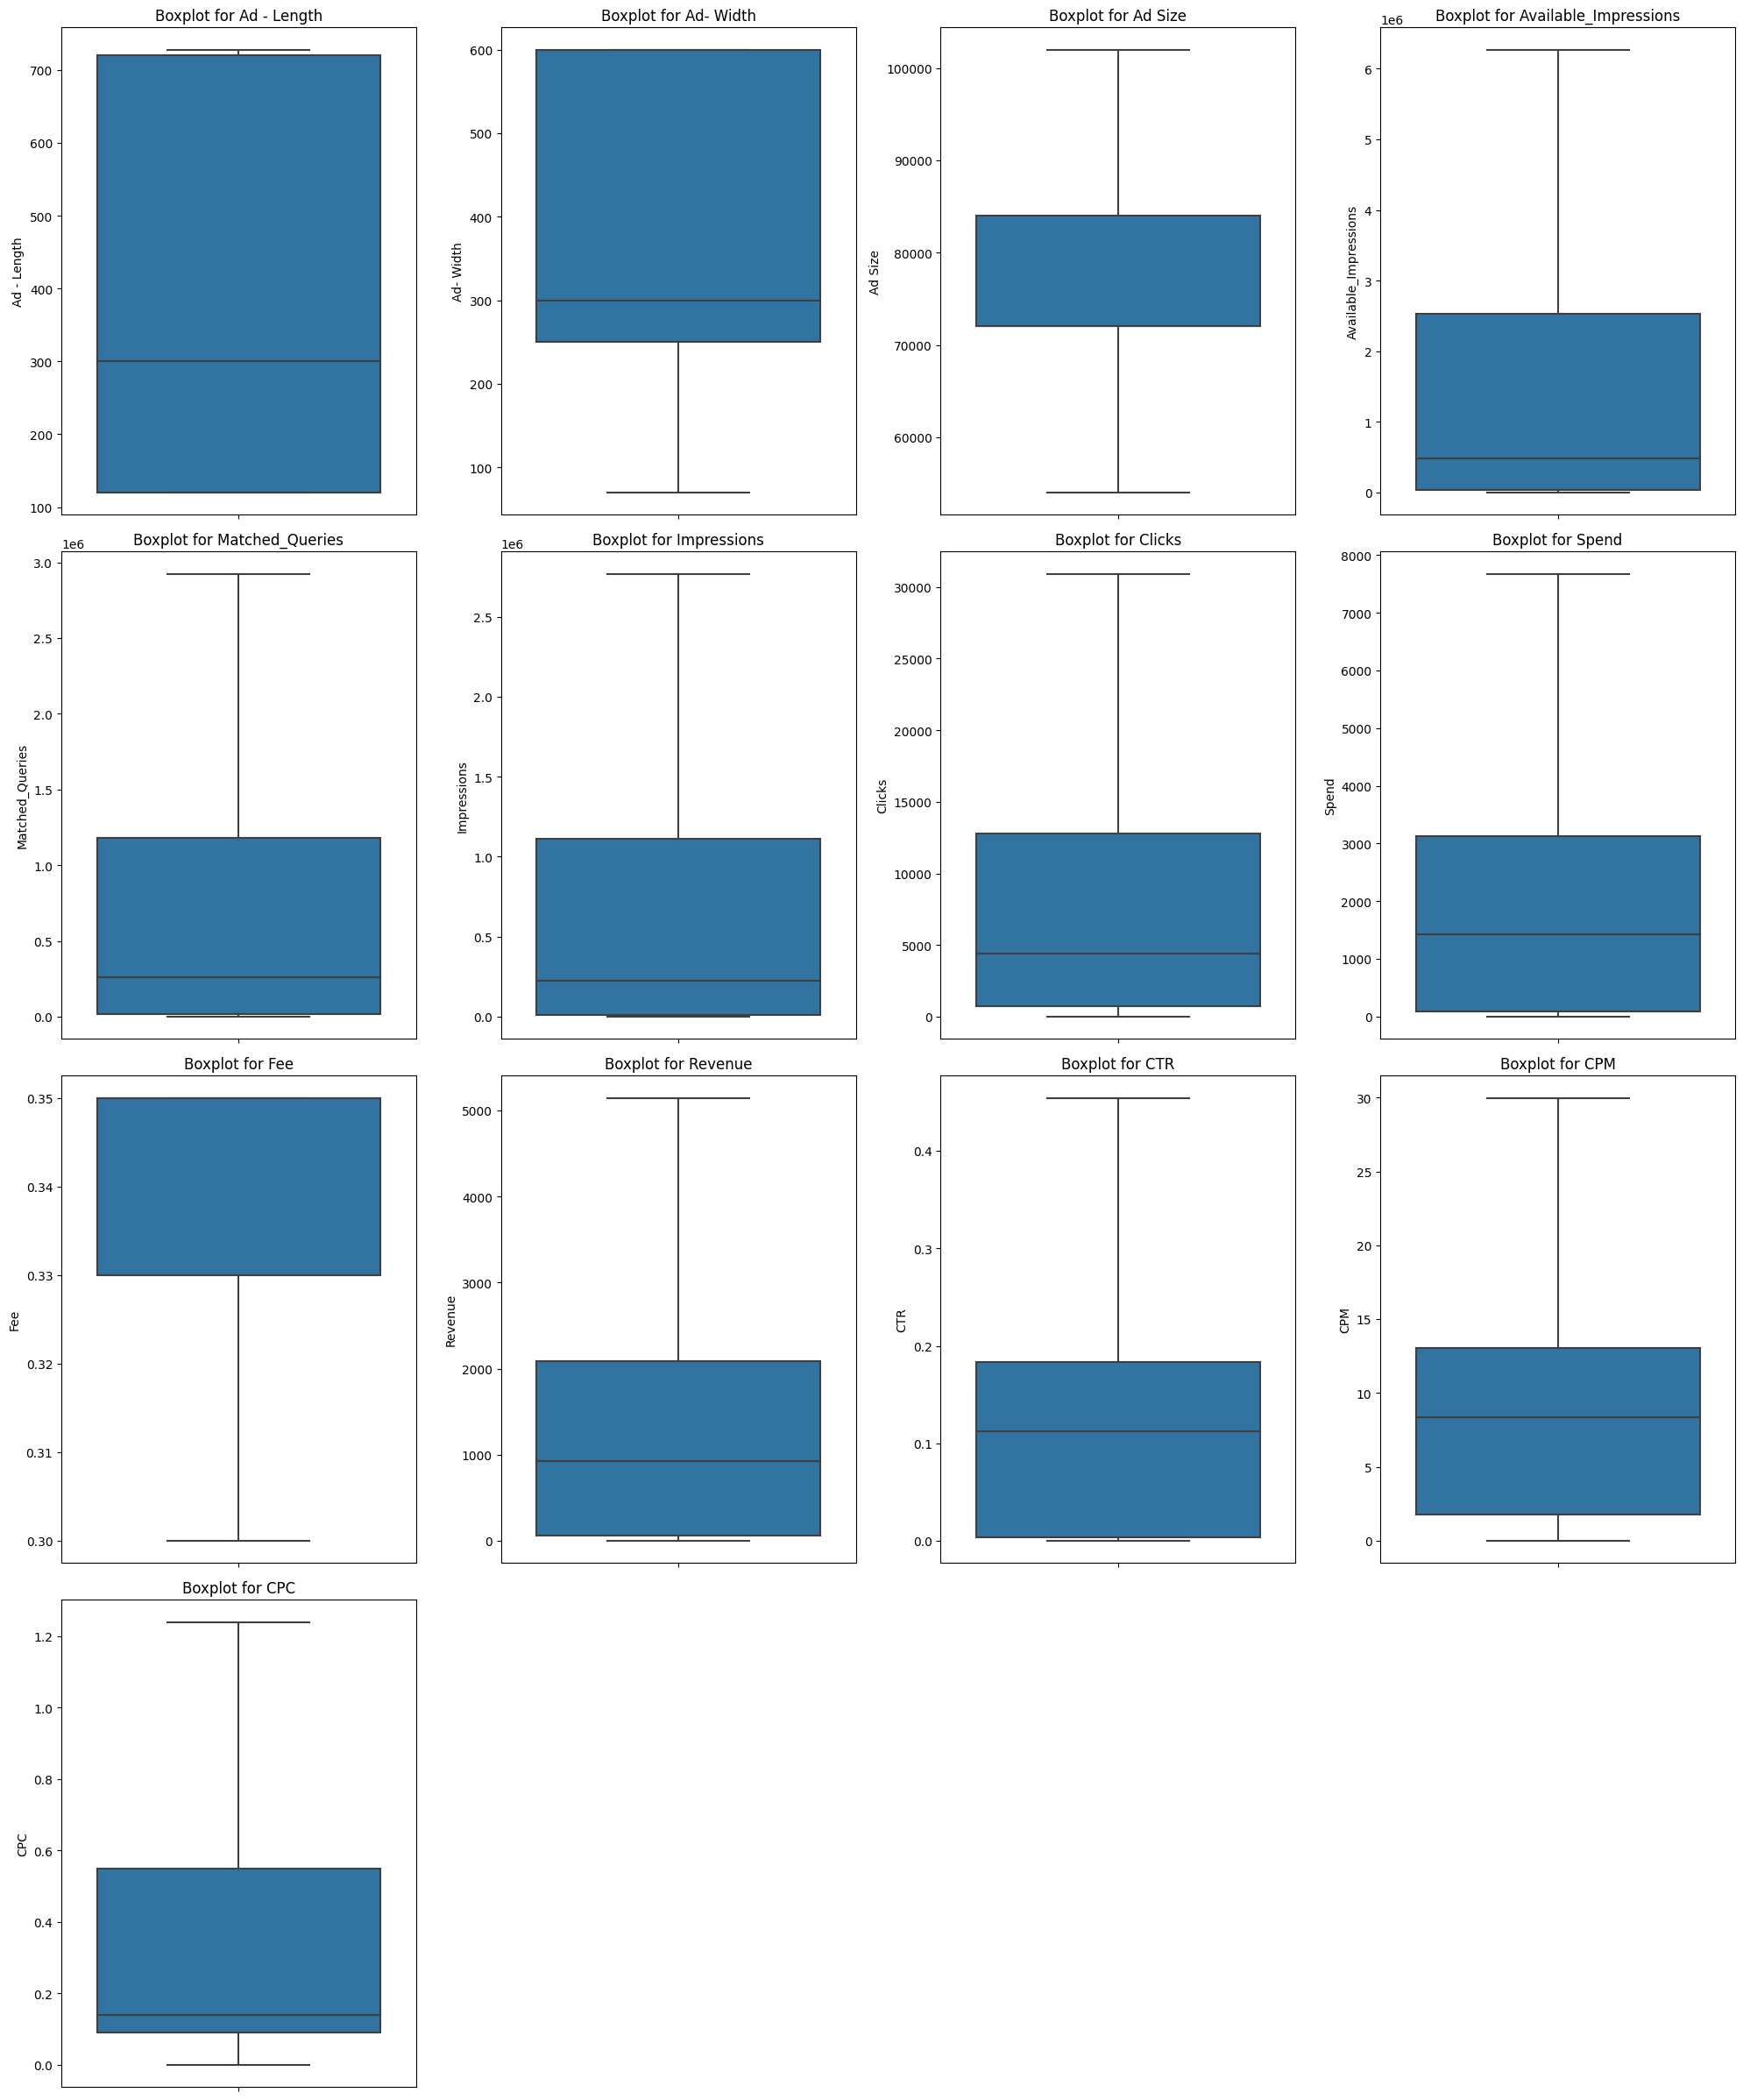

In [ ]:
#Before treating outliers
plt.figure(figsize=(20,30))
for i in range(len(num_columns)):
  plt.subplot(5,4,i+1)
  sn.boxplot(y=ads_df[num_columns[i]],data=ads_df)
  plt.title("Boxplot for {}".format(num_columns[i]))
  plt.tight_layout()





###Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

In [ ]:
def remove_outlier(col):
  Q1,Q3=col.quantile([0.25,0.75])
  
  IQR = Q3-Q1
  
  lower_range = Q1 - (1.5*IQR)
  higher_range = Q3 + (1.5*IQR)
  return lower_range,higher_range
for i in num_columns:
  lr,ur=remove_outlier(ads_df[i])
  ads_df[i] = np.where(ads_df[i] < lr,lr,ads_df[i])
  ads_df[i] = np.where(ads_df[i] > ur,ur,ads_df[i])



In [ ]:
#After outlier treatment
plt.figure(figsize=(20,30))
for i in range(len(num_columns)):
  plt.subplot(5,4,i+1)
  sn.boxplot(y=ads_df[num_columns[i]],data=ads_df)
  plt.title("Boxplot for {}".format(num_columns[i]))
  plt.tight_layout()

###Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [ ]:
scaled_ads_df=ads_df[num_columns].apply(stats.zscore)
unscaled_ads_df=ads_df[num_columns]
non_num_columns=ads_df.select_dtypes(include='object').columns
non_num_df=ads_df[non_num_columns]
transformed_df_for_hierarchial_clustering=pd.concat([non_num_df,scaled_ads_df],axis=1)
transformed_df_for_kmeans_clustering=pd.concat([non_num_df,scaled_ads_df],axis=1)



###Perform clustering and do the following:
Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [ ]:
import datetime
scaled_ads_df.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,0.0,1.0,-1.1349,-1.1349,-0.3645,1.4331,1.4673
Ad- Width,23066.0,-0.0,1.0,-1.3191,-0.4328,-0.1866,1.2906,1.2906
Ad Size,23066.0,0.0,1.0,-1.4678,-0.2976,-0.2976,0.4826,1.6529
Available_Impressions,23066.0,0.0,1.0,-0.7562,-0.7403,-0.5286,0.4331,2.1932
Matched_Queries,23066.0,0.0,1.0,-0.7793,-0.7614,-0.5277,0.3715,2.0709
Impressions,23066.0,0.0,1.0,-0.7688,-0.7607,-0.5390,0.3661,2.0561
Clicks,23066.0,-0.0,1.0,-0.8675,-0.7934,-0.4054,0.4686,2.3617
Spend,23066.0,-0.0,1.0,-0.8932,-0.8580,-0.3055,0.3939,2.2719
Fee,23066.0,0.0,1.0,-2.2224,-0.5675,0.5357,0.5357,0.5357
Revenue,23066.0,0.0,1.0,-0.8801,-0.8465,-0.3176,0.3898,2.2442


In [ ]:
print("Started at "+str(datetime.datetime.now()))
from scipy.cluster.hierarchy import dendrogram,linkage

Started at 2023-06-11 14:52:48.202273


Ends at 2023-06-11 14:54:26.613463


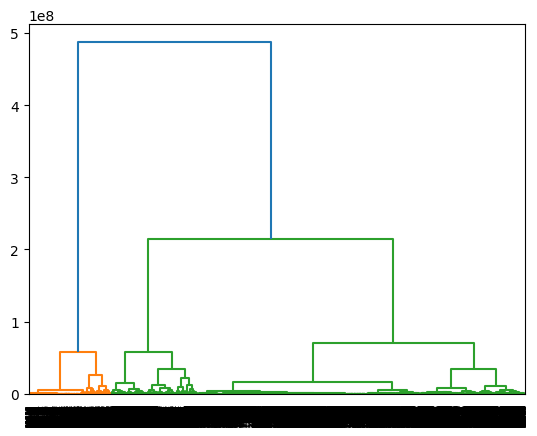

In [ ]:
#clustering before applying zscore

wardlink = linkage(unscaled_ads_df,method='ward',metric='euclidean')
dend = dendrogram(wardlink)
print("Ends at "+str(datetime.datetime.now()))


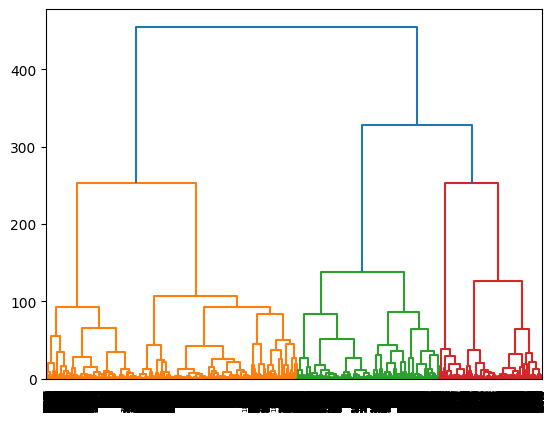

In [85]:
#clustering after applying zscore
#print("Started at "+str(datetime.datetime.now()))
scaled_ads_df
from scipy.cluster.hierarchy import dendrogram,linkage
wardlink = linkage(scaled_ads_df,method='ward',metric='euclidean')
dend = dendrogram(wardlink)
#print("Ends at "+str(datetime.datetime.now()))

In [86]:
from scipy.cluster.hierarchy import fcluster
clusters= fcluster(wardlink,2,criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [87]:
transformed_df_for_hierarchial_clustering['Cluster_num']=clusters

In [88]:
transformed_df_for_hierarchial_clustering.head()

,Timestamp,InventoryType,Ad Type,Platform,Device Type,Format,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster_num
0,2020-9-2-17,Format1,Inter222,Video,Desktop,Display,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.891201,-1.194562,-1.04114,1
1,2020-9-2-10,Format1,Inter227,App,Mobile,Video,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.888615,-1.194562,-1.04114,1
2,2020-9-1-22,Format1,Inter222,Video,Desktop,Display,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.893142,-1.194562,-1.04114,1
3,2020-9-3-20,Format1,Inter228,Video,Mobile,Video,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.898315,-1.194562,-1.04114,1
4,2020-9-4-15,Format1,Inter217,Web,Desktop,Video,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.884734,-1.194562,-1.04114,1


In [89]:
transformed_df_for_hierarchial_clustering['Cluster_num'].value_counts()

1    11690
2    11376
Name: Cluster_num, dtype: int64

###Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm

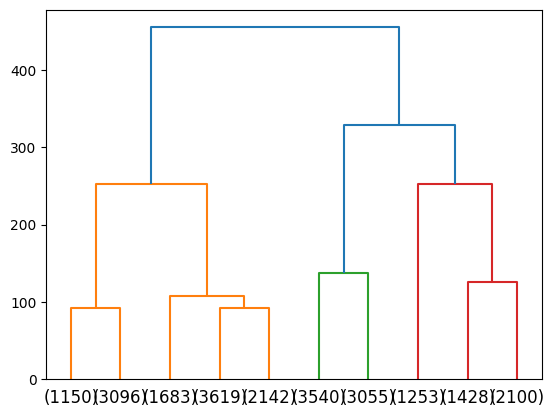

In [90]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)

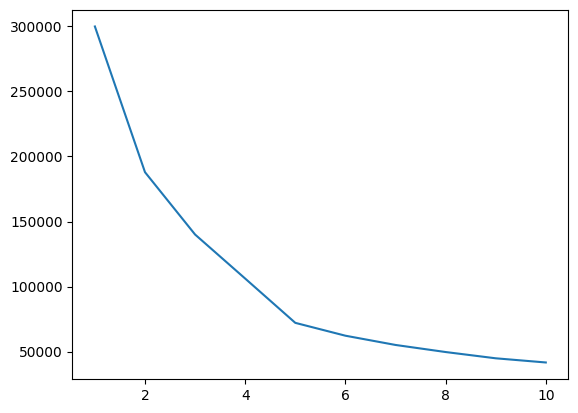

In [91]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
wss = []
sil_scores=[]
for i in range(1,11):
  k_means = KMeans(n_clusters=i)
  k_means.fit(scaled_ads_df)
  wss.append(k_means.inertia_)
  if(i>1):
    sil_scores.append("silhouette_score for "+str(i)+" is : "+str(silhouette_score(scaled_ads_df,k_means.labels_)))
plt.plot(range(1,11),wss)
plt.show();

In [92]:
wss

[299858.0000000002,
 187902.64770993218,
 139992.8492213263,
 106152.73750299937,
 72133.69903381875,
 62259.98703046419,
 55151.54166556952,
 49712.881984673695,
 44897.51304241229,
 41685.36170278616]

In [93]:

sil_scores
#The value of the Silhouette score varies from -1 to 1. If the score is near to 1, the cluster is dense and well-separated than other clusters

['silhouette_score for 2 is : 0.40318725804432765',
 'silhouette_score for 3 is : 0.345502256719923',
 'silhouette_score for 4 is : 0.41284225649057377',
 'silhouette_score for 5 is : 0.4801920840538707',
 'silhouette_score for 6 is : 0.4761448792627615',
 'silhouette_score for 7 is : 0.4688486998487128',
 'silhouette_score for 8 is : 0.4323400457749357',
 'silhouette_score for 9 is : 0.4147368649095824',
 'silhouette_score for 10 is : 0.43653564454506044']

###Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [94]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_ads_df)
labels = k_means.labels_

In [95]:
transformed_df_for_kmeans_clustering['Cluster_num']=labels

In [96]:
transformed_df_for_kmeans_clustering['Cluster_num'].value_counts()

0    17183
1     5883
Name: Cluster_num, dtype: int64

###Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

In [97]:
transformed_df_for_kmeans_clustering.groupby(by='Cluster_num')['Clicks','Spend','Revenue','CPM','CTR','CPC'].sum()

,Clicks,Spend,Revenue,CPM,CTR,CPC
Cluster_num,,,,,,
0,-3845.499858,-8667.377698,-8706.226073,3242.112757,2862.445624,-5553.432482
1,3845.499858,8667.377698,8706.226073,-3242.112757,-2862.445624,5553.432482


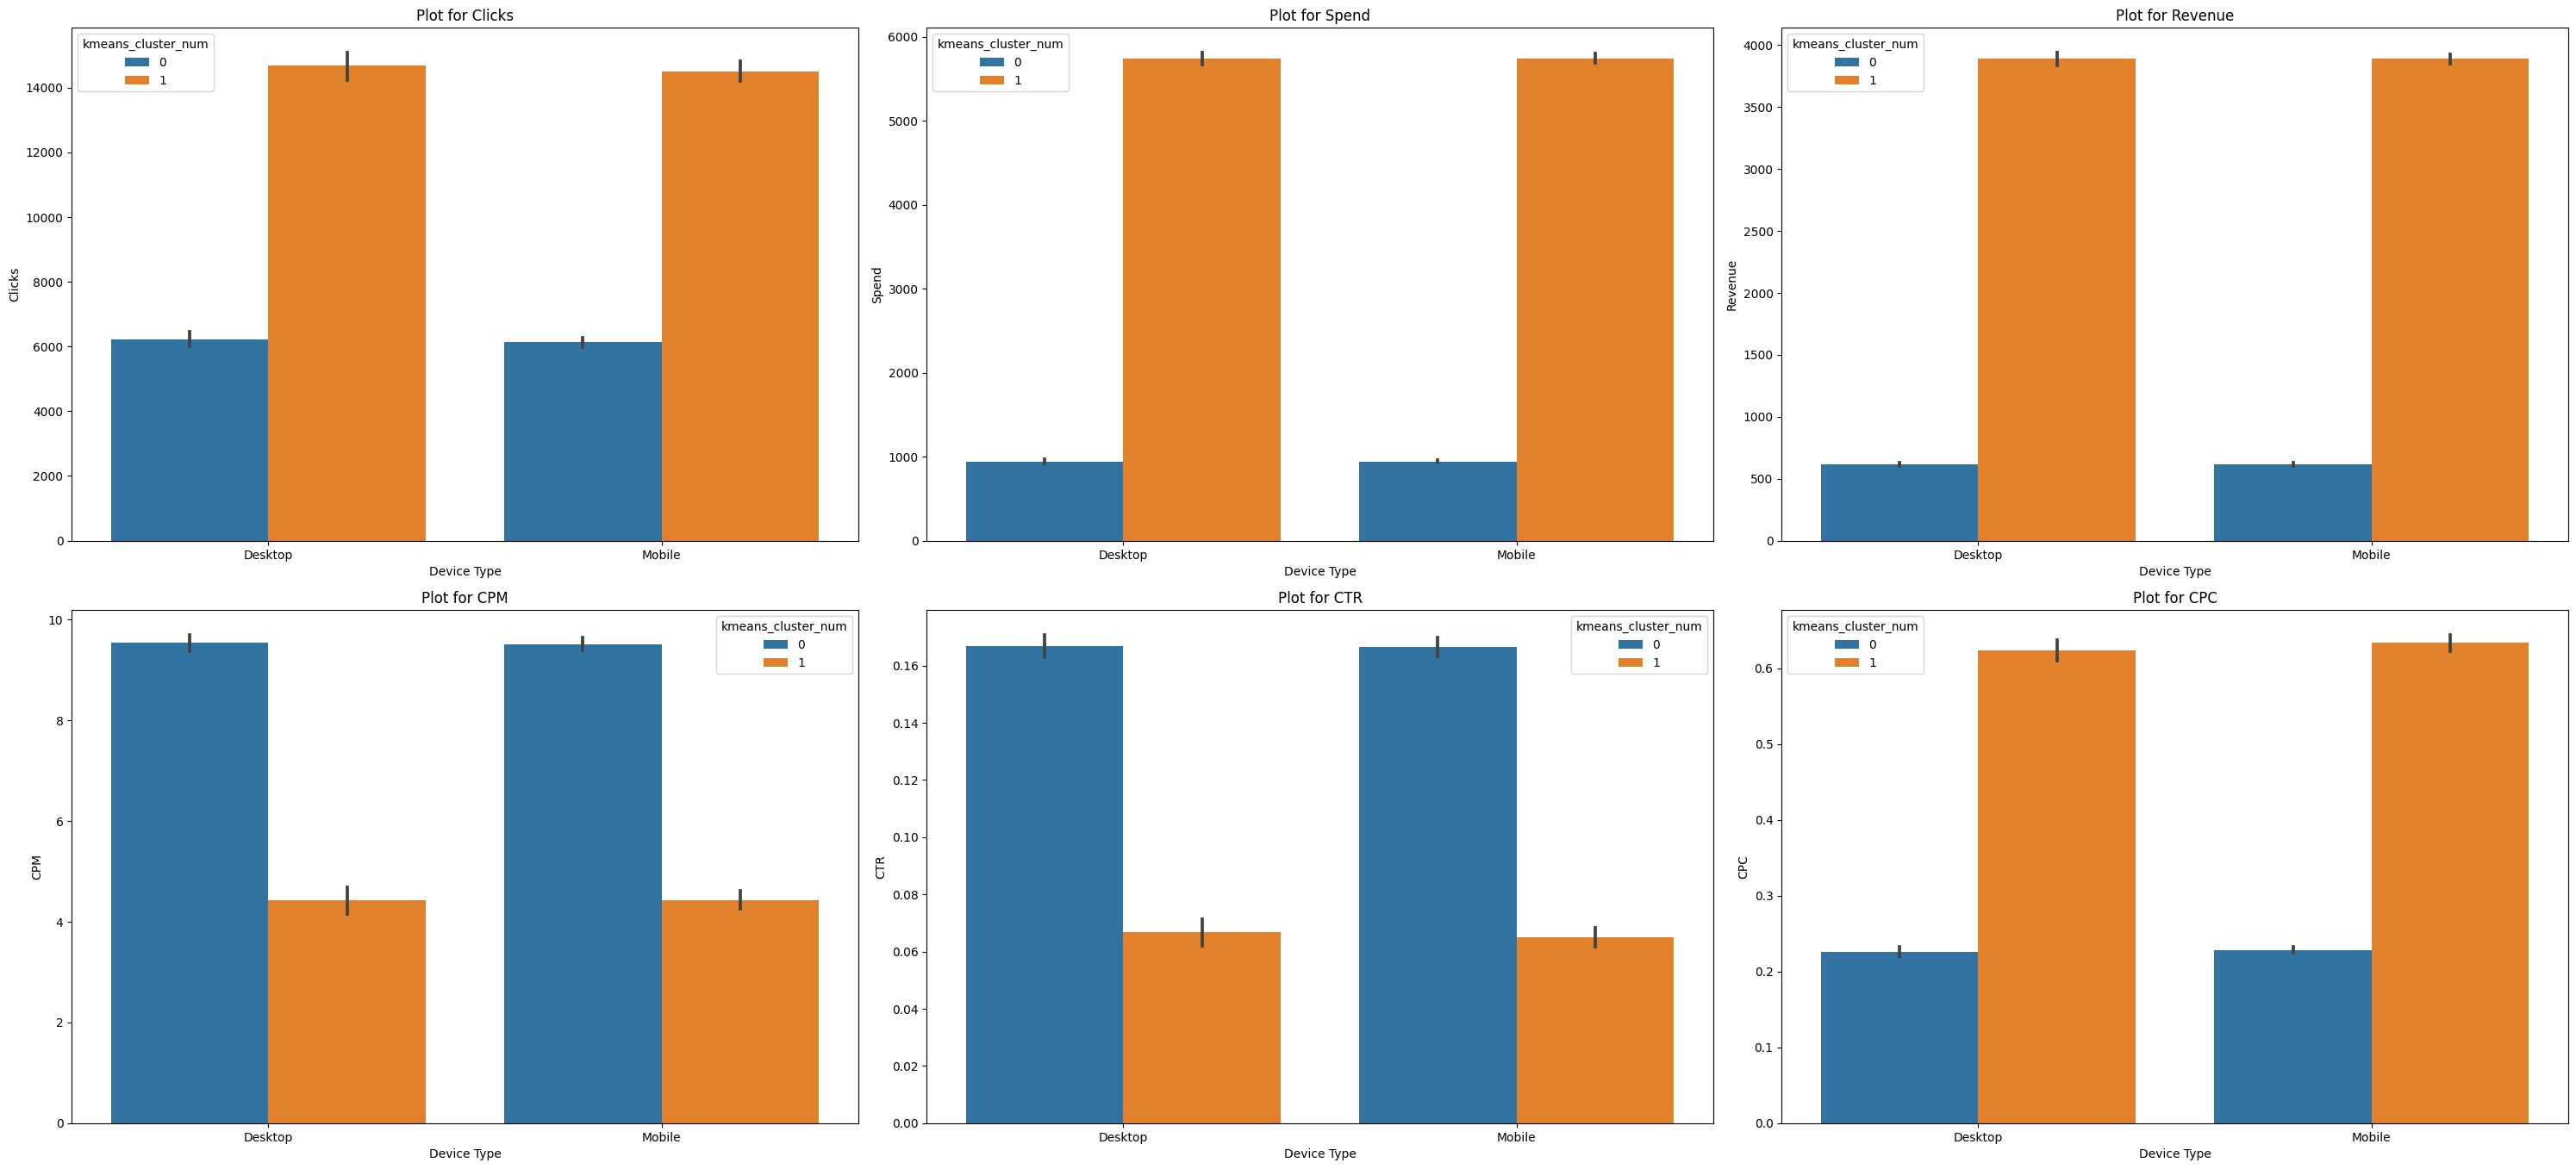

In [98]:
ads_df['kmeans_cluster_num']=transformed_df_for_kmeans_clustering['Cluster_num']
plt.figure(figsize=(30,20))
c=1
for i in (['Clicks','Spend','Revenue','CPM','CTR','CPC']):
  
  plt.subplot(3,3,c)
  sn.barplot(data=ads_df,x='Device Type',y=i,hue=ads_df['kmeans_cluster_num'])
  plt.title("Plot for {}".format(i))
  plt.tight_layout()
  c+=1
  


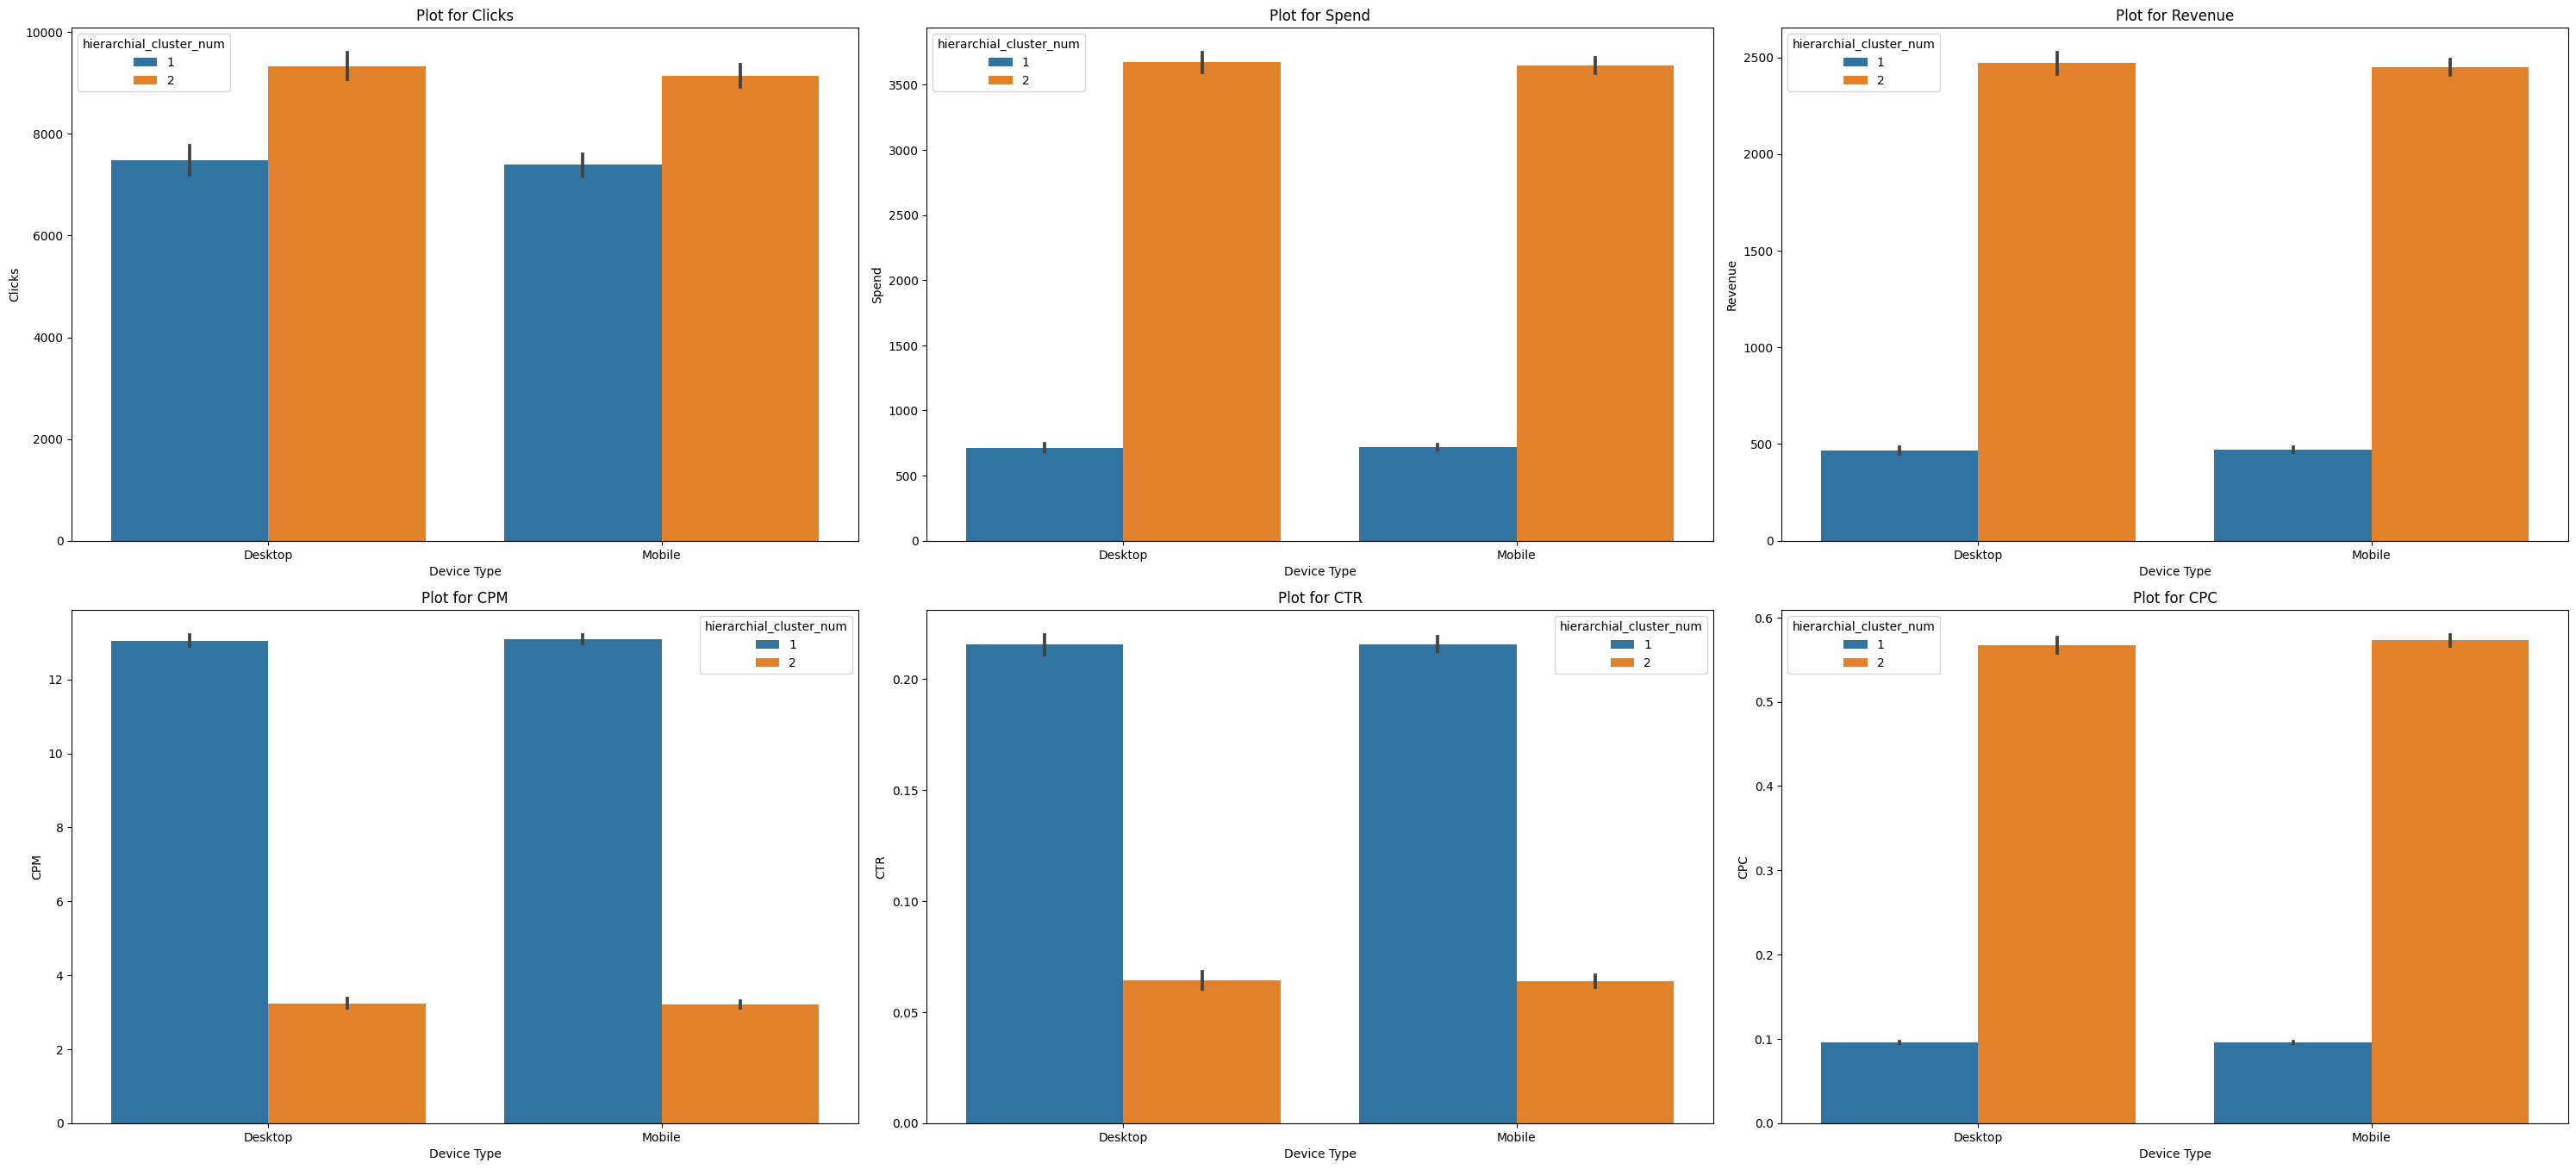

In [99]:

ads_df['hierarchial_cluster_num']=transformed_df_for_hierarchial_clustering['Cluster_num']
#transformed_df_for_hierarchial_clustering.groupby(by='Cluster_num')['Clicks','Spend','Revenue','CPM','CTR','CPC'].sum()
ads_df['kmeans_cluster_num']=transformed_df_for_kmeans_clustering['Cluster_num']
plt.figure(figsize=(30,20))
c=1
for i in (['Clicks','Spend','Revenue','CPM','CTR','CPC']):
  
  plt.subplot(3,3,c)
  sn.barplot(data=ads_df,x='Device Type',y=i,hue=ads_df['hierarchial_cluster_num'])

  plt.title("Plot for {}".format(i))
  plt.tight_layout()
  c+=1

In [ ]:
#ads_df.to_excel("/content/drive/MyDrive/Colab Notebooks/ads_df.xlsx")

###Conclude the project by providing summary of your learnings.

In [100]:
#sn.barplot(data=ads_df,x='Device Type',y='Clicks',hue=ads_df['kmeans_cluster_num'])

#ads_df.groupby(by='kmeans_cluster_num')['Clicks','Spend','Revenue','CPM','CTR','CPC'].sum()
ads_df[['kmeans_cluster_num','Clicks']].groupby(by='kmeans_cluster_num')['Clicks'].mean()

kmeans_cluster_num
0    1.056693e+07
1    2.286467e+07
Name: Revenue, dtype: float64

In [106]:
ads_df[['kmeans_cluster_num','Spend']].groupby(by='kmeans_cluster_num')['Spend'].mean()

kmeans_cluster_num
0     942.782505
1    5738.995484
Name: Spend, dtype: float64

In [ ]:
ads_df[['kmeans_cluster_num','Revenue']].groupby(by='kmeans_cluster_num')['Revenue'].mean()

In [ ]:
ads_df[['kmeans_cluster_num','CPM']].groupby(by='kmeans_cluster_num')['CPM'].mean()

In [ ]:
ads_df[['kmeans_cluster_num','CTR']].groupby(by='kmeans_cluster_num')['CTR'].mean()

In [ ]:
ads_df[['kmeans_cluster_num','CPC']].groupby(by='kmeans_cluster_num')['CPC'].mean()

#PCA

##PCA FH (FT): 
Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [ ]:
census_df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PCA India Data_Census.xlsx")

###PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [ ]:
#census_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PCA India Data_Census.xls")
census_df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
census_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [ ]:
census_df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [ ]:
print(census_df.isnull().sum().to_string())
#census_df.isnull().sum()[0:61].sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


In [ ]:
print("Duplicate count in census data: "+str(census_df.duplicated().sum()))

Duplicate count in census data: 0


###PCA: Perform detailed Exploratory analysis by creating certain questions like 
(i) Which state has highest gender ratio and which has the lowest? 
Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [ ]:
df=census_df[['State','TOT_M','TOT_F']].groupby(by=['State'])['TOT_M','TOT_F'].sum()
df['Gender_Ratio(M/F)']=df['TOT_M']/df['TOT_F']


In [ ]:
#State with least gender ratio
df.sort_values(by='Gender_Ratio(M/F)',ascending=True).head(1)

,TOT_M,TOT_F,Gender_Ratio(M/F)
State,,,
Andhra Pradesh,3274363,6097235,0.537024


In [ ]:
#State with highest gender ratio
df.sort_values(by='Gender_Ratio(M/F)',ascending=True).tail(1)

,TOT_M,TOT_F,Gender_Ratio(M/F)
State,,,
Lakshadweep,12823,14772,0.868061


#####(ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [ ]:
df=census_df[['Area Name','TOT_M','TOT_F']].groupby(by=['Area Name'])['TOT_M','TOT_F'].sum()
df['Gender_Ratio(M/F)']=df['TOT_M']/df['TOT_F']

In [ ]:
#District with least gender ratio(M/F)
df.sort_values(by='Gender_Ratio(M/F)',ascending=True).head(1)

,TOT_M,TOT_F,Gender_Ratio(M/F)
Area Name,,,
Krishna,137603,314182,0.437972


In [ ]:
##District with highest gender ratio(M/F)
df.sort_values(by='Gender_Ratio(M/F)',ascending=True).tail(1)

,TOT_M,TOT_F,Gender_Ratio(M/F)
Area Name,,,
Lakshadweep,12823,14772,0.868061


######State with highest number of households

In [ ]:
census_df[['State','No_HH']].groupby(by='State').sum()

,No_HH
State,
Andaman & Nicobar Island,13012
Andhra Pradesh,3127287
Arunachal Pradesh,35114
Assam,853374
Bihar,1974627
Chandigarh,24016
Chhattisgarh,734616
Dadara & Nagar Havelli,4288
Daman & Diu,7455


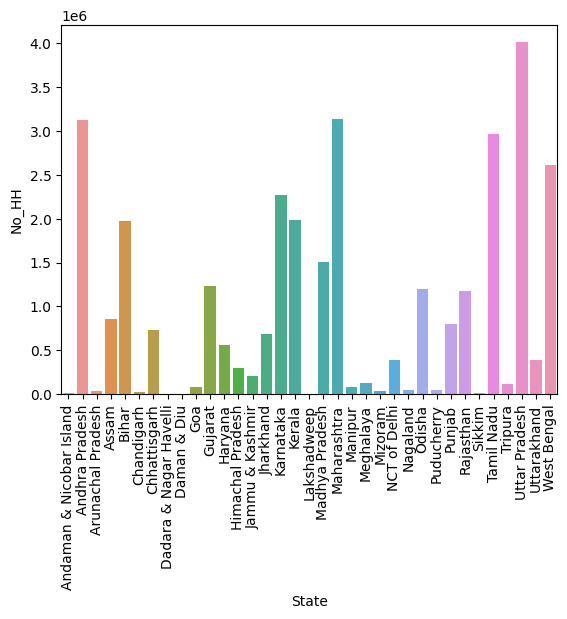

In [ ]:
#State with highest number of households
plt.xticks(rotation=90)
sn.barplot(data=census_df[['State','No_HH']].groupby(by='State').sum(),x=census_df[['State','No_HH']].groupby(by='State').sum().index,y=census_df[['State','No_HH']].groupby(by='State').sum()['No_HH']);


######States highest/lowest literacy rate

In [ ]:
#States with highest literacy rate
census_df['Total_Population']=census_df['TOT_F']+census_df['TOT_M']
census_df['Literate_Population']=census_df['M_LIT']+census_df['F_LIT']
df_literacy_rate=census_df[['State','Total_Population','Literate_Population']].groupby(by='State').sum()
df_literacy_rate['Literacy_Rate']=df_literacy_rate['Literate_Population']/df_literacy_rate['Total_Population']
df_literacy_rate.sort_values(by='Literacy_Rate',ascending=False).head()

,Total_Population,Literate_Population,Literacy_Rate
State,,,
Mizoram,154997,127924,0.825332
Kerala,7776182,6248535,0.803548
Lakshadweep,27595,21935,0.794890
Goa,310372,239130,0.770463
Chandigarh,101397,76990,0.759293


In [ ]:
#States with lowest literacy rate
df_literacy_rate.sort_values(by='Literacy_Rate',ascending=True).head()

,Total_Population,Literate_Population,Literacy_Rate
State,,,
Bihar,9431081,4606423,0.488430
Jharkhand,2966507,1568780,0.528831
Andhra Pradesh,9371598,5051574,0.539030
Rajasthan,5029059,2764097,0.549625
Uttar Pradesh,21067854,11591154,0.550182


######State with most agricultural labours

In [ ]:
census_df['MAIN_AL_M']+census_df['MAIN_AL_F']

0       550
1       550
2       107
3        32
4       491
       ... 
635      32
636    1548
637       2
638      91
639     155
Length: 640, dtype: int64

In [ ]:
copy_census_df=census_df.copy(deep=True)
copy_census_df['AgriLab']=census_df['MAIN_AL_M']+census_df['MAIN_AL_F']
copy_census_df[['State','AgriLab']].groupby(by='State').sum()


,AgriLab
State,
Andaman & Nicobar Island,248
Andhra Pradesh,1659383
Arunachal Pradesh,1757
Assam,124454
Bihar,774104
Chandigarh,133
Chhattisgarh,237823
Dadara & Nagar Havelli,571
Daman & Diu,117


<Axes: xlabel='State', ylabel='AgriLab'>

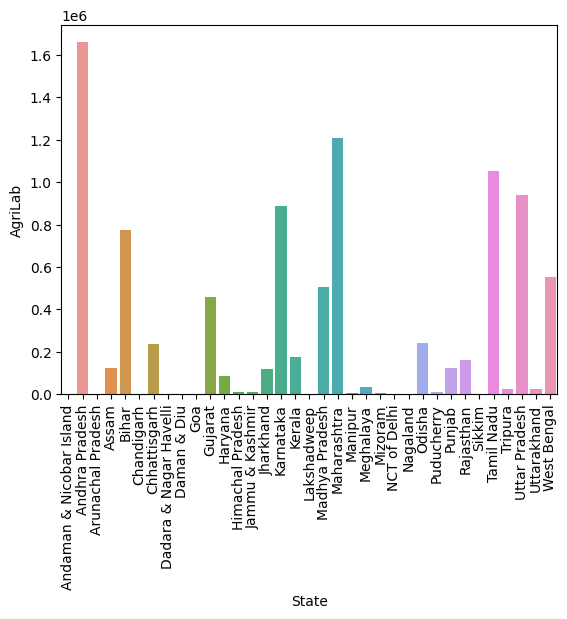

In [ ]:
plt.xticks(rotation=90)
plt.ylabel("Agricultural Labours")
sn.barplot(data=copy_census_df[['State','AgriLab']].groupby(by='State').sum(),x=copy_census_df.groupby(by='State').sum().index,y=copy_census_df.groupby(by='State').sum()['AgriLab'])

###PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

In [ ]:
cat_columns=census_df.columns[0:4]
cat_columns
cat_df=census_df[cat_columns]
cat_df.head()

,State Code,Dist.Code,State,Area Name
0,1,1,Jammu & Kashmir,Kupwara
1,1,2,Jammu & Kashmir,Badgam
2,1,3,Jammu & Kashmir,Leh(Ladakh)
3,1,4,Jammu & Kashmir,Kargil
4,1,5,Jammu & Kashmir,Punch


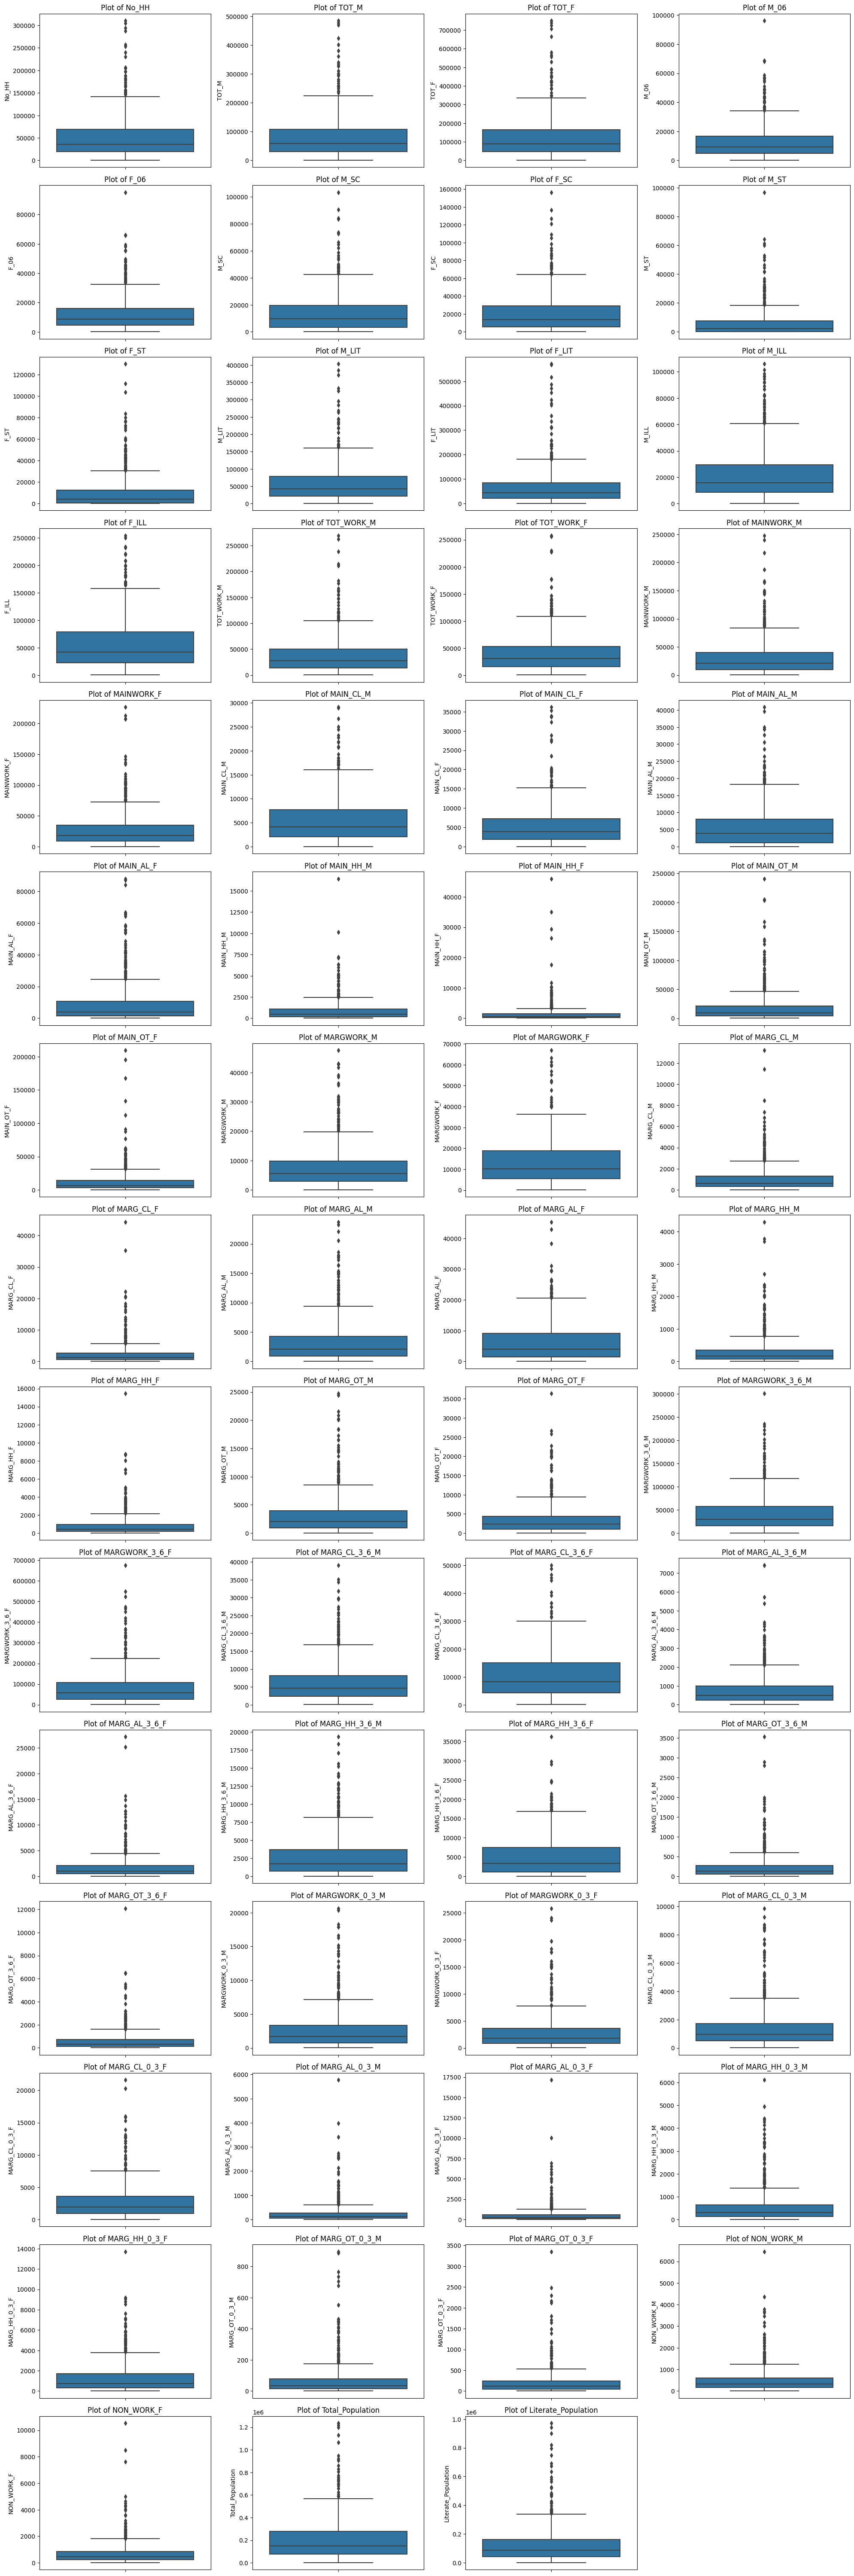

In [ ]:
numeric_columns=census_df.columns[4:]
numeric_columns
plt.figure(figsize=(20,80))
for i in range(len(numeric_columns)):
  plt.subplot(20,4,i+1)
  sn.boxplot(data=census_df,y=census_df[numeric_columns[i]])
  plt.title("Plot of {}".format(numeric_columns[i]))
  plt.tight_layout();
  

###PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [ ]:
census_df[numeric_columns].head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,Total_Population,Literate_Population
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,180,237,680,252,32,46,258,214,53184,24745
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,123,229,186,148,76,178,140,160,42687,18404
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,44,89,3,34,0,4,67,61,17510,10374
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,61,128,13,50,4,10,116,59,6990,3804
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,465,1043,205,302,24,105,180,478,50572,26720


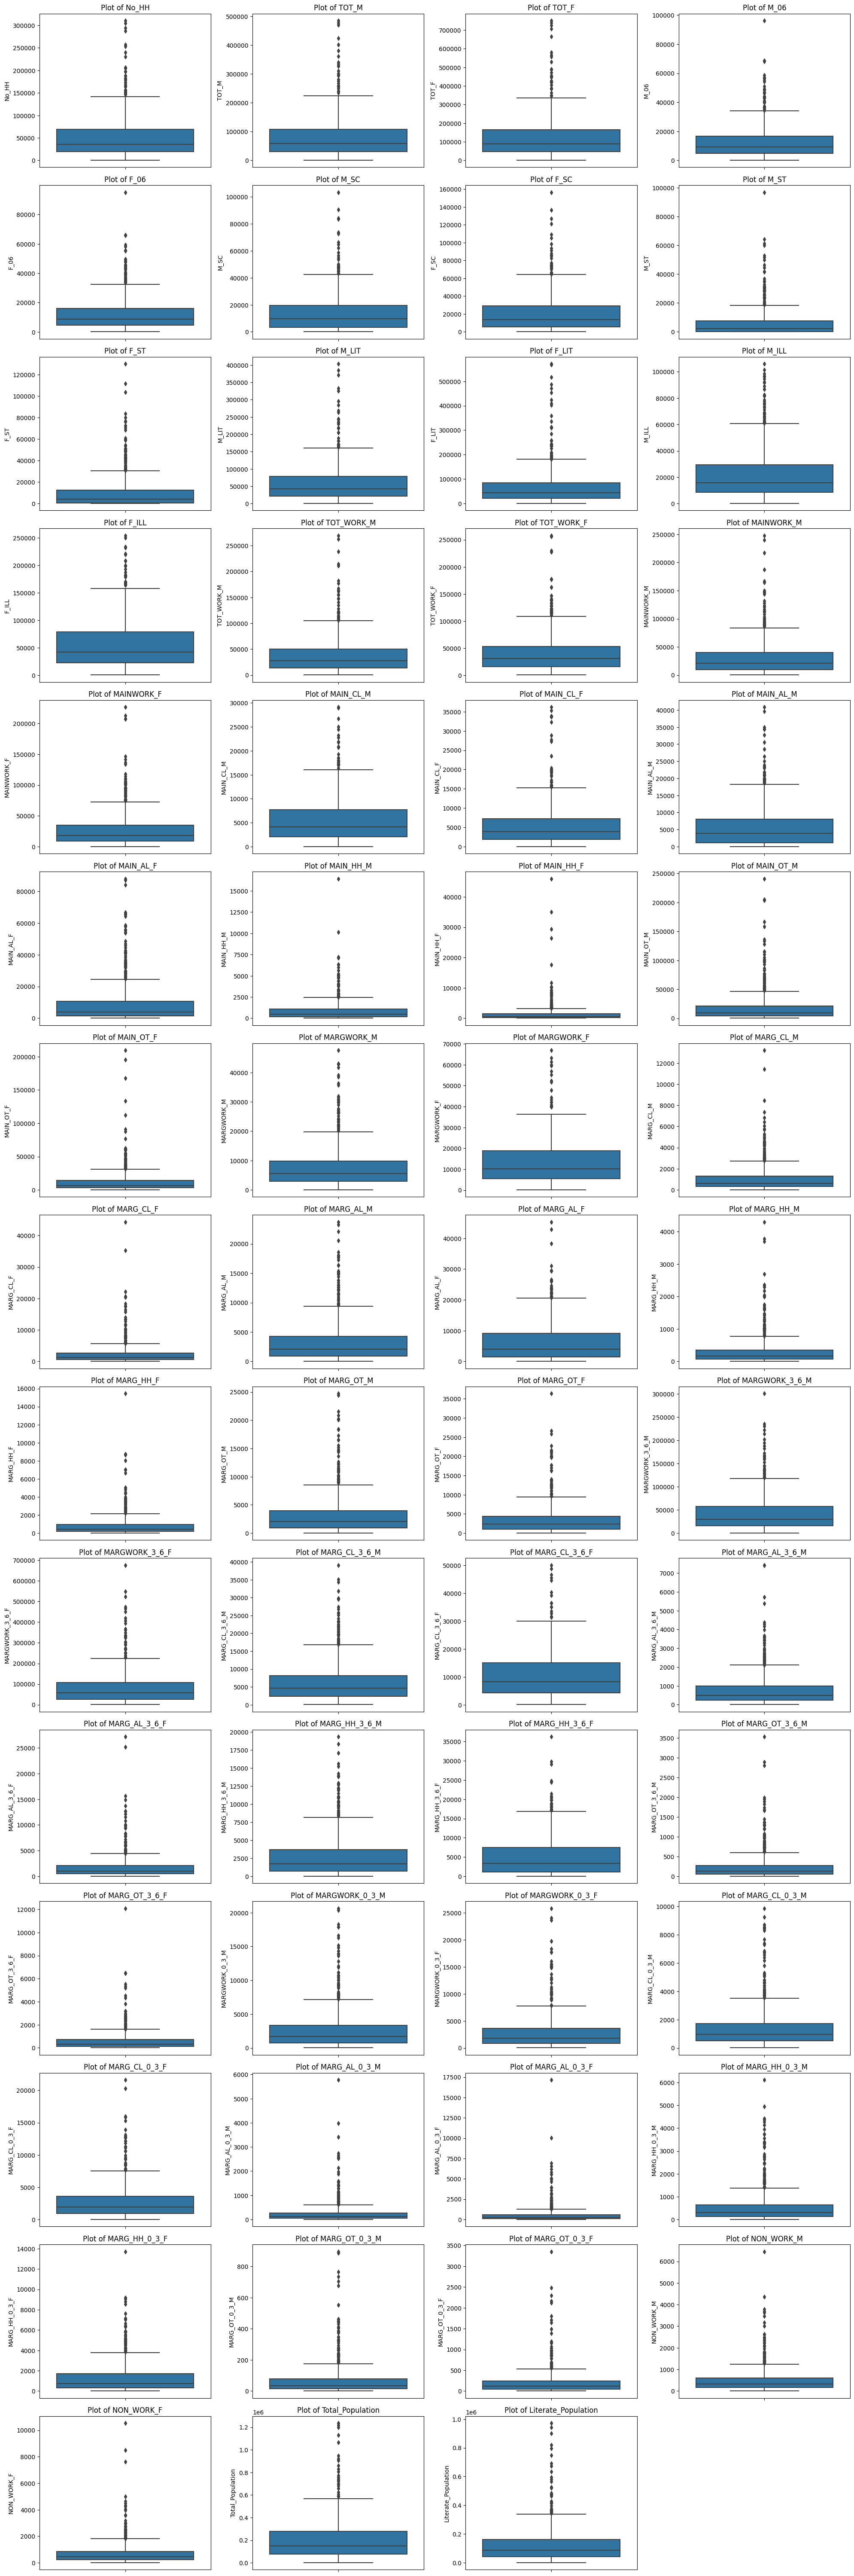

In [ ]:
#boxplot before scaling
plt.figure(figsize=(20,80))
for i in range(len(numeric_columns)):
  plt.subplot(20,4,i+1)
  sn.boxplot(data=census_df,y=census_df[numeric_columns[i]])
  plt.title("Plot of {}".format(numeric_columns[i]))
  plt.tight_layout();
  

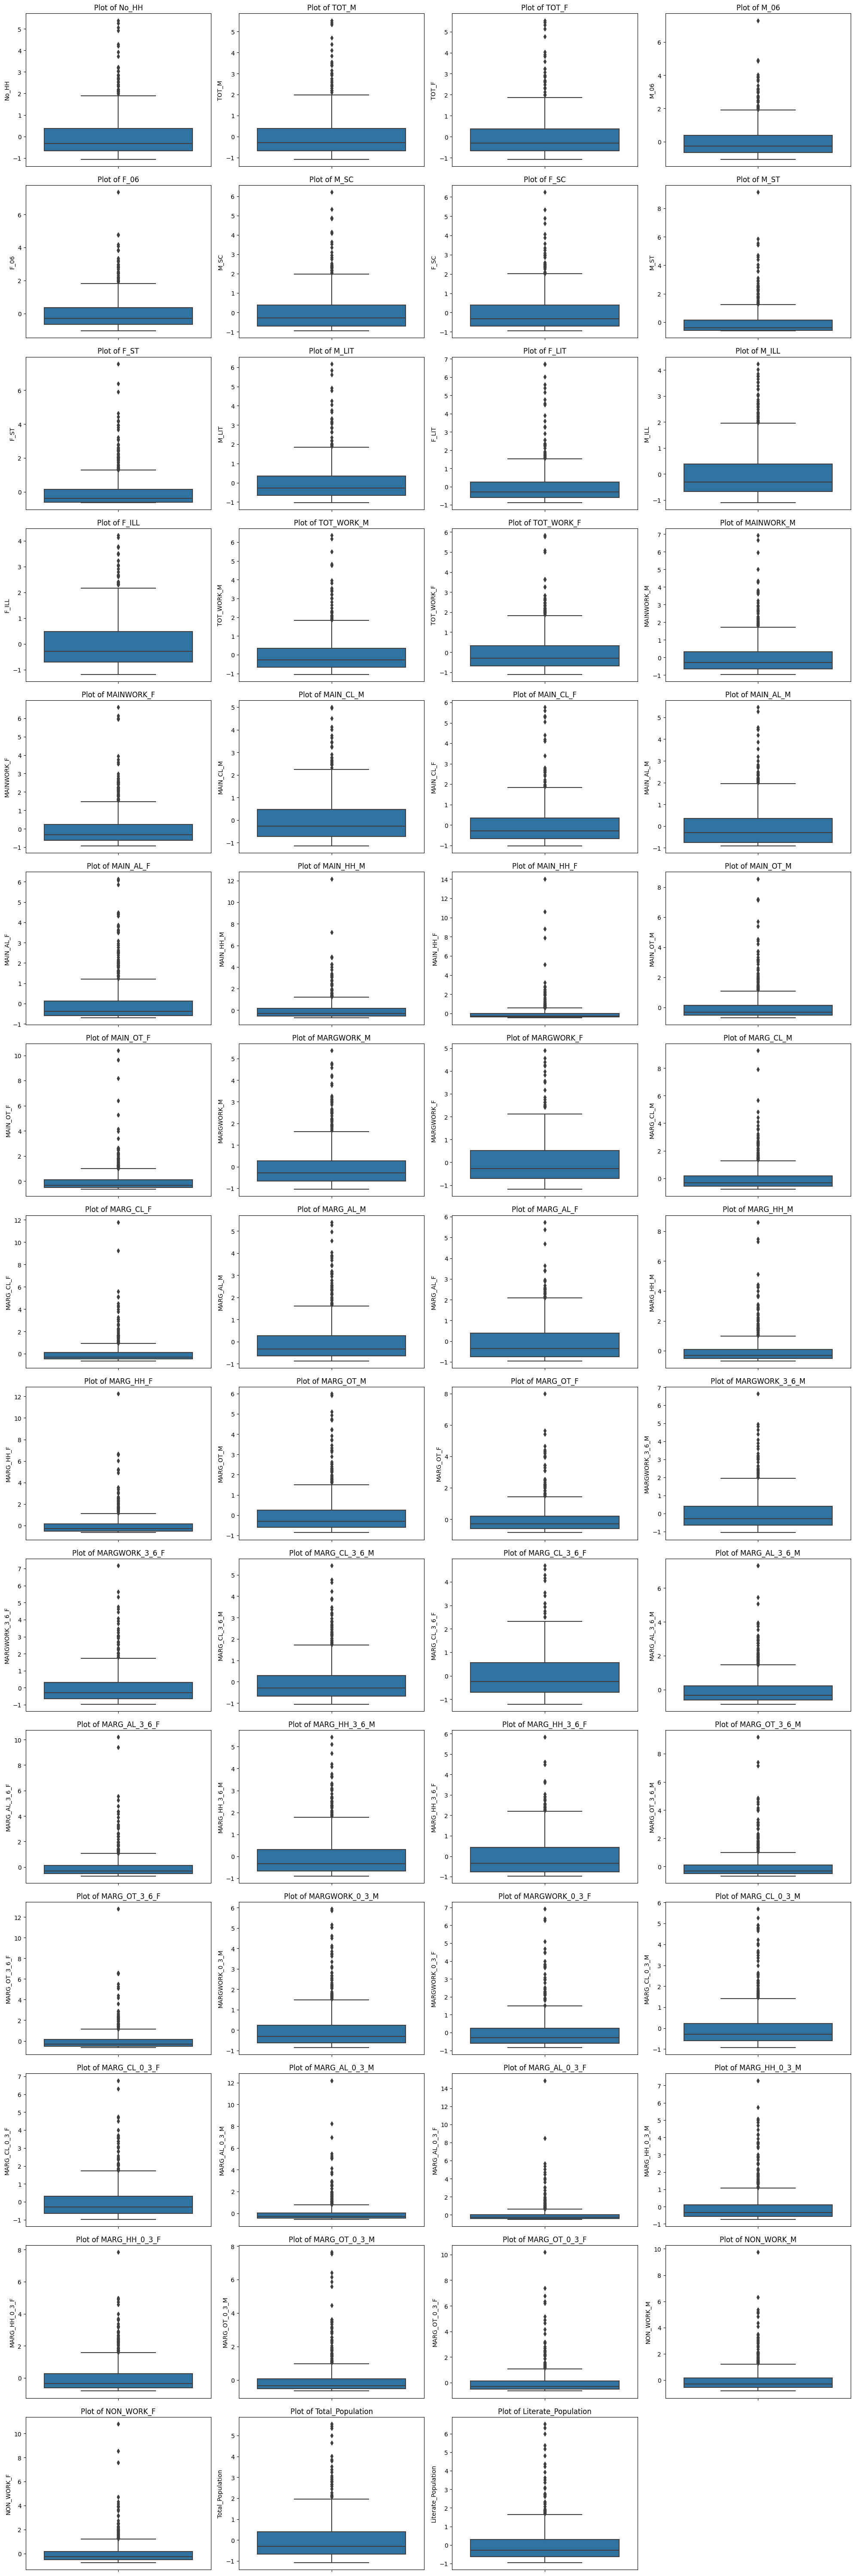

In [ ]:
#boxplot after scaling
scaled_census_df=census_df[numeric_columns].apply(stats.zscore)
scaled_census_df.describe().round(2).T
plt.figure(figsize=(20,80))
for i in range(len(numeric_columns)):
  plt.subplot(20,4,i+1)
  sn.boxplot(data=scaled_census_df,y=scaled_census_df[numeric_columns[i]])
  plt.title("Plot of {}".format(numeric_columns[i]))
  plt.tight_layout();

In [ ]:
census_df.drop('Total_Population',inplace=True,axis='columns')
census_df.drop('Literate_Population',inplace=True,axis='columns')

scaled_census_df.drop('Total_Population',inplace=True,axis='columns')
scaled_census_df.drop('Literate_Population',inplace=True,axis='columns')
scaled_census_df.shape

(640, 57)

###PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [ ]:
#Step 1 - Verify if PCA is feasable for the given dataset
#Lets perfom KMO test to test how good the data is to perform PCA. If MSA value greater than 0.7 then PCA will be recommended.
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_census_df)
if(kmo_model>0.7):
  print("PCA can be performed as MSA value("+str(kmo_model)+") is greater than 0.7 which means the data is expected to provide considerable reduction in dimensions")
#Step 2
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_census_df)
p_value

PCA can be performed as MSA value(0.8039889932781807) is greater than 0.7 which means the data is expected to provide considerable reduction in dimensions


0.0

In [ ]:
#Step 3 - Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=57,random_state=123)
pca_df = pca.fit_transform(scaled_census_df)
pca_df.round(2)

array([[-4.62,  0.14,  0.33, ...,  0.  ,  0.  ,  0.  ],
       [-4.77, -0.11,  0.24, ...,  0.  ,  0.  , -0.  ],
       [-5.96, -0.29,  0.37, ..., -0.  ,  0.  , -0.  ],
       ...,
       [-6.29, -0.64,  0.11, ..., -0.  , -0.  ,  0.  ],
       [-6.22, -0.67,  0.27, ..., -0.  ,  0.  ,  0.  ],
       [-5.9 , -0.94,  0.35, ...,  0.  , -0.  , -0.  ]])

In [ ]:
#Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n ',pca.components_.round(2))

Eigen Vectors 
  [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.    0.38  0.15 ...  0.03 -0.08 -0.03]
 [-0.    0.24  0.09 ... -0.03 -0.02  0.04]
 [-0.   -0.09 -0.01 ...  0.01 -0.01 -0.  ]]


In [ ]:
print(pca.explained_variance_ratio_.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [ ]:
# Step 3 - Obtaining the Cumulative Sum of the Expalained Variance 
var_exp=pca.explained_variance_ratio_.round(2)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_.round(2))
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [56. 70. 77. 83. 87. 90. 92. 93. 94. 95. 96. 97. 98. 98. 98. 98. 98. 98.
 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98.
 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 98.
 98. 98. 98.]


###PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

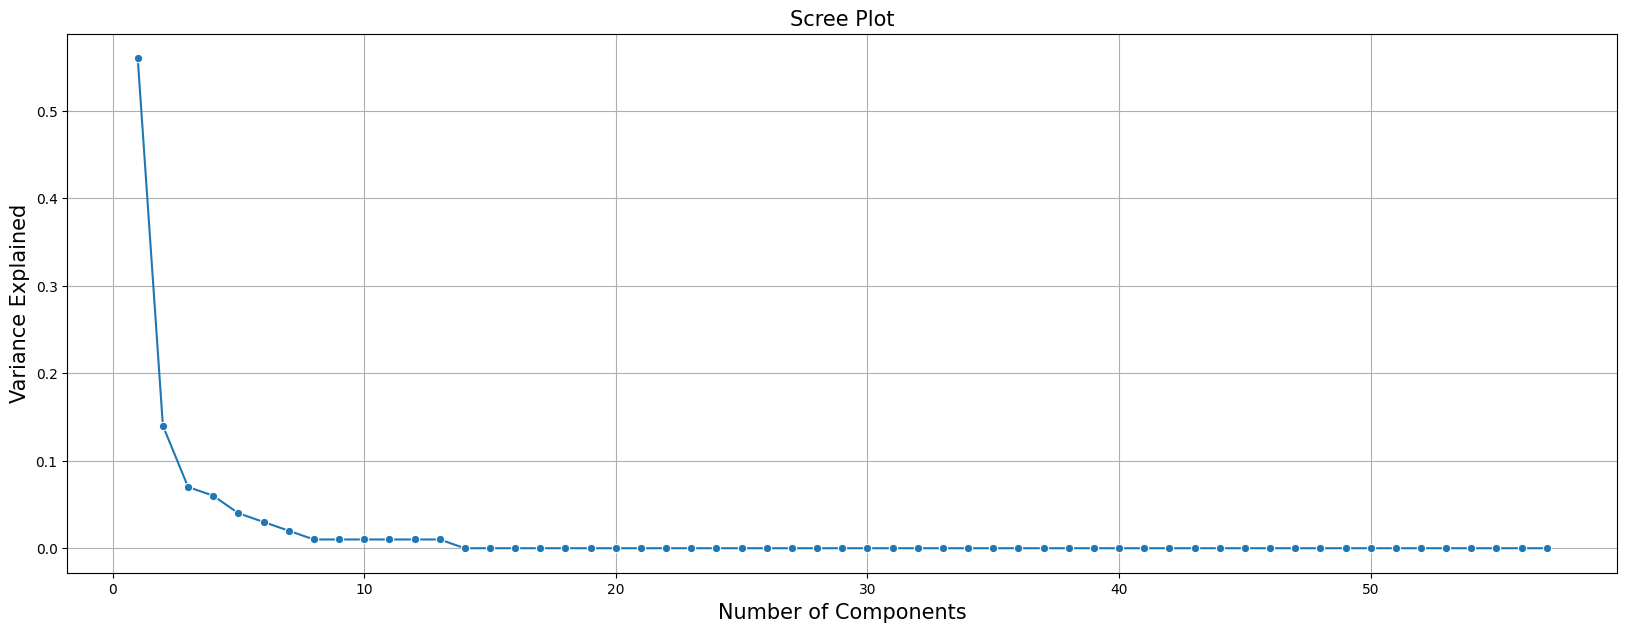

In [ ]:
# Step 4 - View Scree Plot to identify the number of components to be built
plt.figure(figsize=(20,7))
sn.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [ ]:
# Step 5 - Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions as we have decided to consider 90% explained variance (dimensionality reduction from 57 to 6)
pca = PCA(n_components=6, random_state=123)
pca_df = pca.fit_transform(scaled_census_df)
pca_df.transpose().round(2) # Component output

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       [ 1.54,  1.96,  0.62, ...,  1.37,  1.14,  1.11],
       [ 0.35, -0.15,  0.48, ...,  0.15,  0.06,  0.15],
       [-0.42,  0.42,  0.28, ...,  0.14, -0.12, -0.15]])

In [ ]:
pca_df.shape

(640, 6)

In [ ]:
# Loading of each feature on the components
# Eigen Vectors when PC's are kept as 6
pca.components_.round(2)

array([[ 0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,  0.03,  0.03,
         0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,  0.12,  0.1 ,
         0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,  0.16,  0.16,
         0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,  0.15,  0.16,
         0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,  0.14,  0.12,
         0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,  0.12,  0.14,
         0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , -0.02, -0.02, -0.05, -0.05,  0.03,  0.03,
        -0.12, -0.15, -0.01, -0.01, -0.13, -0.09, -0.18, -0.15,  0.06,
         0.09, -0.03, -0.06, -0.08, -0.08, -0.21, -0.21,  0.09,  0.13,
         0.27,  0.25,  0.17,  0.14,  0.07,  0.02, -0.09, -0.12, -0.04,
        -0.11,  0.08,  0.1 ,  0.26,  0.24,  0.16,  0.13,  0.06,  0.01,
        -0.09, -0.13,  0.15,  0.18,  0.25,  0.24,  0.19,  0.18,  0.08,
         0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04,  0.06,  0.05,  0.  , -0.03, -0.12, -0.14,
         0.08,  0

In [ ]:
#explained variance ratio
pca.explained_variance_ratio_.round(2)

array([0.56, 0.14, 0.07, 0.06, 0.04, 0.03])

In [ ]:
numeric_columns=numeric_columns[0:len(numeric_columns)-2]
numeric_columns


Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [ ]:
# Component loading when PC's are kept as 6

pca_loading_df = pd.DataFrame(pca.components_.round(2),columns=list(numeric_columns))
pca_loading_df.shape

(6, 57)

In [ ]:
pca_loading_df

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.16,0.17,0.17,0.16,0.16,0.15,0.15,0.03,0.03,0.16,...,0.15,0.14,0.05,0.04,0.12,0.12,0.14,0.13,0.15,0.13
1,-0.13,-0.09,-0.10,-0.02,-0.02,-0.05,-0.05,0.03,0.03,-0.12,...,0.15,0.18,0.25,0.24,0.19,0.18,0.08,0.05,-0.07,-0.07
2,-0.00,0.06,0.04,0.06,0.05,0.00,-0.03,-0.12,-0.14,0.08,...,0.05,0.02,0.27,0.28,-0.14,-0.20,-0.02,-0.08,0.11,0.10
3,-0.13,-0.02,-0.07,0.01,0.01,0.01,-0.03,-0.22,-0.23,-0.04,...,0.09,-0.02,-0.10,-0.14,0.13,0.00,0.23,0.21,0.08,0.02
4,-0.01,-0.03,-0.01,-0.05,-0.04,-0.17,-0.16,0.43,0.44,-0.01,...,0.08,0.13,-0.05,-0.05,0.06,0.13,-0.04,0.00,0.16,0.24
5,0.00,-0.07,-0.04,-0.16,-0.15,-0.06,-0.04,0.22,0.23,-0.06,...,-0.06,-0.00,0.07,0.08,-0.12,-0.11,0.06,0.30,-0.05,-0.02


###PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

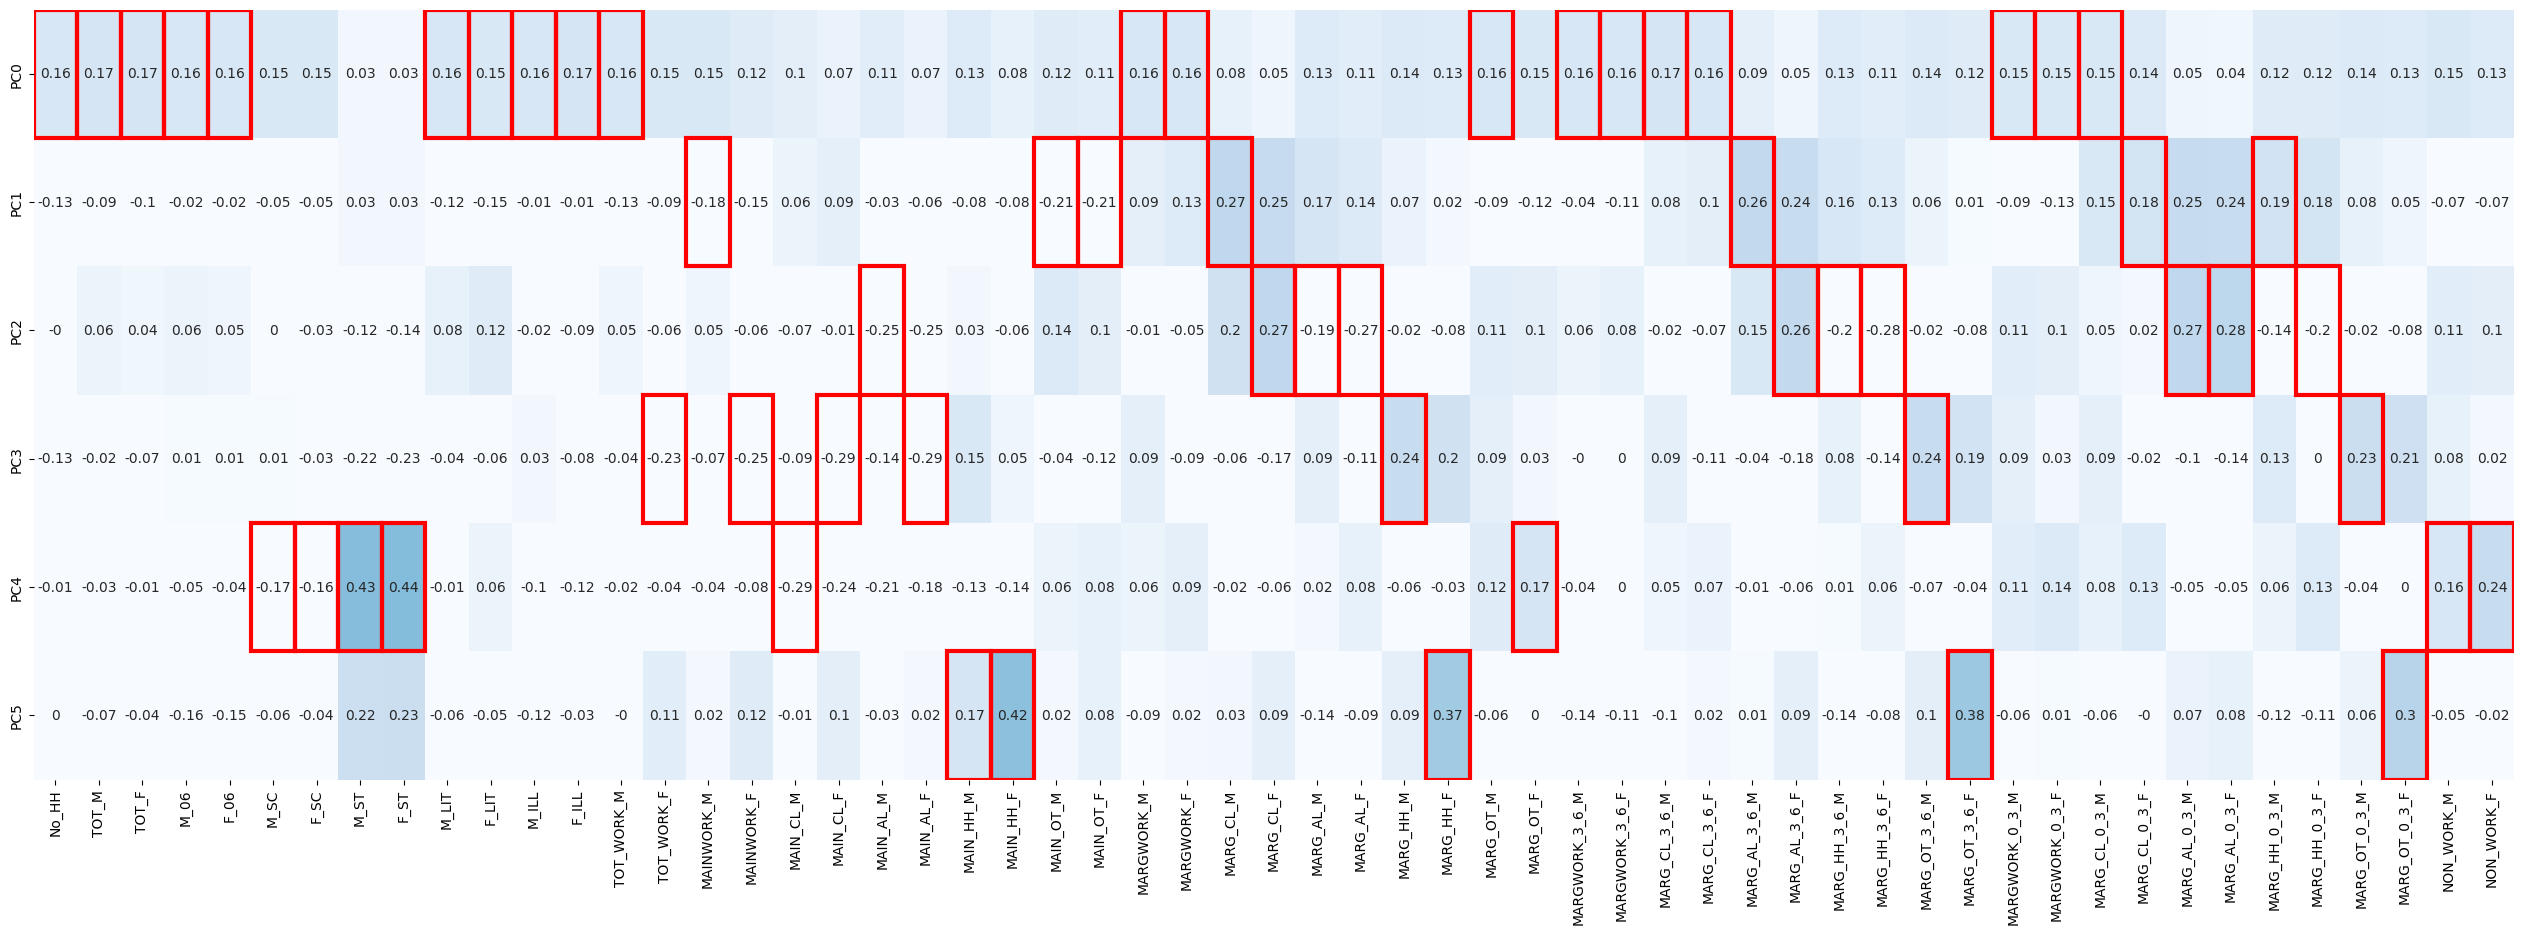

In [ ]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(32, 10), facecolor='w', edgecolor='k')
ax = sn.heatmap(pca_loading_df, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = pca_loading_df.abs().idxmax(axis=0)

for col, variable in enumerate(pca_loading_df.columns):
    position = pca_loading_df.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [ ]:
pca_df = pd.DataFrame(pca_df.round(2),columns=['PC0','PC1','PC2','PC3',
                                  'PC4','PC5'])
pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5
0,-4.62,0.14,0.33,1.54,0.35,-0.42
1,-4.77,-0.11,0.24,1.96,-0.15,0.42
2,-5.96,-0.29,0.37,0.62,0.48,0.28
3,-6.28,-0.50,0.21,1.07,0.30,0.05
4,-4.48,0.89,1.08,0.54,0.80,0.34


In [ ]:
pca_df.shape

(640, 6)

In [ ]:
new_df=pd.concat([cat_df,pca_df],axis=1)

In [ ]:
new_df.shape

(640, 10)

In [ ]:
new_df.head()

,State Code,Dist.Code,State,Area Name,PC0,PC1,PC2,PC3,PC4,PC5
0,1,1,Jammu & Kashmir,Kupwara,-4.62,0.14,0.33,1.54,0.35,-0.42
1,1,2,Jammu & Kashmir,Badgam,-4.77,-0.11,0.24,1.96,-0.15,0.42
2,1,3,Jammu & Kashmir,Leh(Ladakh),-5.96,-0.29,0.37,0.62,0.48,0.28
3,1,4,Jammu & Kashmir,Kargil,-6.28,-0.50,0.21,1.07,0.30,0.05
4,1,5,Jammu & Kashmir,Punch,-4.48,0.89,1.08,0.54,0.80,0.34


In [ ]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.00,9.0000,18.000,24.0000,35.00
Dist.Code,640.0,320.500000,184.896367,1.00,160.7500,320.500,480.2500,640.00
PC0,640.0,0.000297,5.640273,-6.57,-3.8150,-1.605,2.5000,26.28
PC1,640.0,-0.000094,2.805428,-15.01,-1.1025,-0.280,1.0525,18.29
PC2,640.0,-0.000172,2.038035,-7.72,-0.8925,0.050,0.5325,17.78
PC3,640.0,-0.000031,1.915459,-7.22,-0.8400,0.380,1.0325,10.93
PC4,640.0,-0.000047,1.485695,-4.61,-0.7400,-0.085,0.5300,7.89
PC5,640.0,-0.000313,1.392348,-7.61,-0.4800,-0.035,0.3825,14.81


<Axes: xlabel='State', ylabel='PC0'>

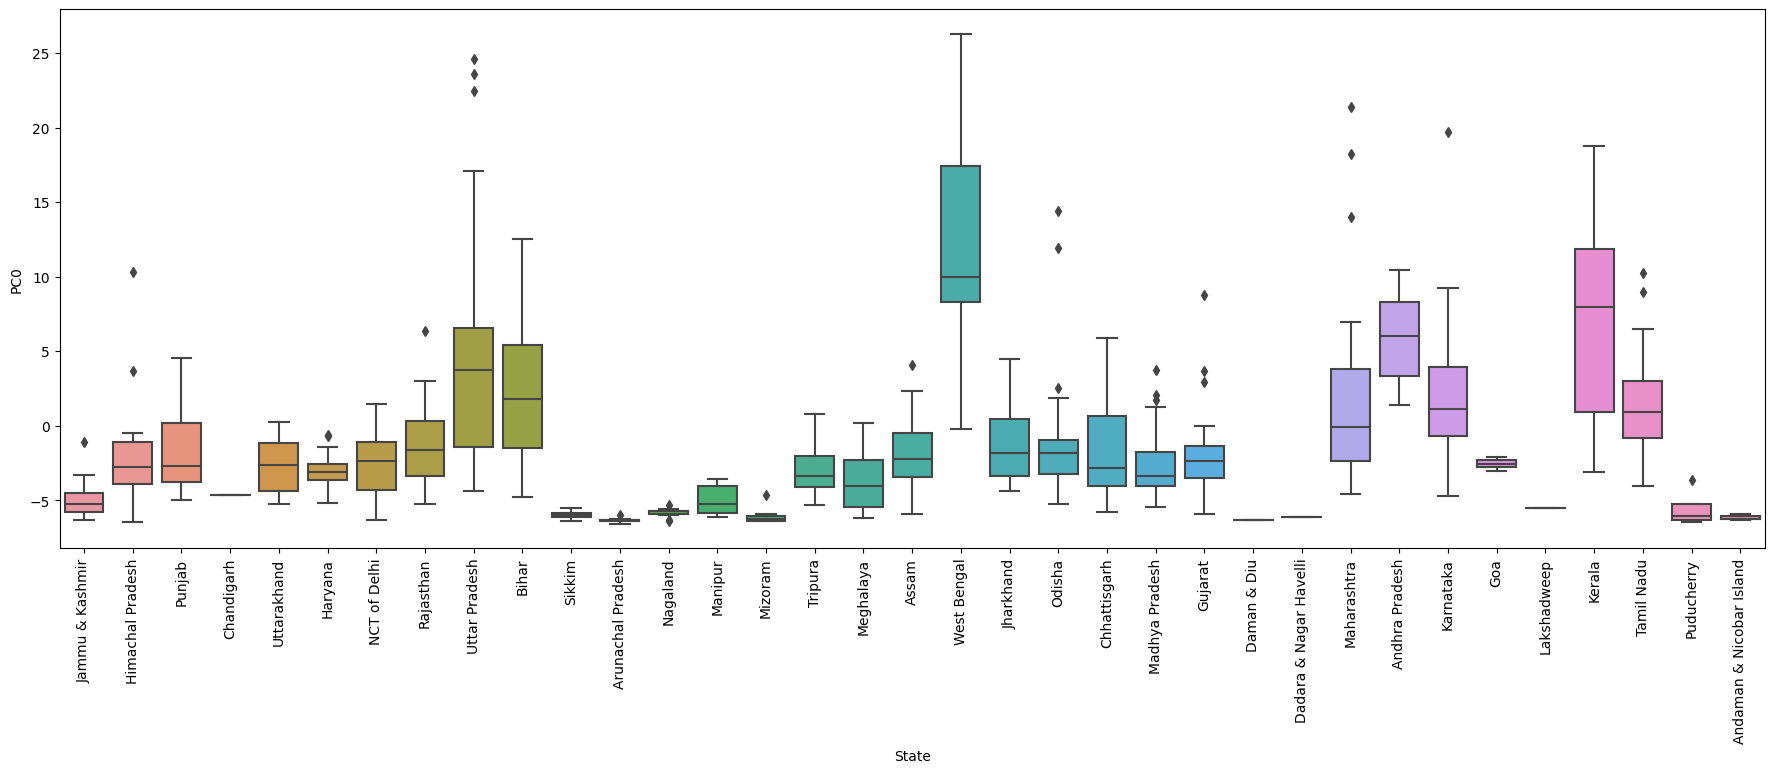

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
plt.xticks(rotation=90)
sn.boxplot(x='State',y='PC0', data=new_df)

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
plt.xticks(rotation=90)
sn.boxplot(x='State',y='PC1', data=new_df)

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
plt.xticks(rotation=90)
sn.boxplot(x='State',y='PC2', data=new_df)

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
plt.xticks(rotation=90)
sn.boxplot(x='State',y='PC3', data=new_df)

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
plt.xticks(rotation=90)
sn.boxplot(x='State',y='PC4', data=new_df)

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
plt.xticks(rotation=90)
sn.boxplot(x='State',y='PC5', data=new_df)

###PCA: Write linear equation for first PC.

In [ ]:
for i in range(0,57):
  print("(",np.round(pca.components_[0][i],2),")",'*',scaled_census_df.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0